#Usual Loading

importing libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# seaborn or matplotlib (histogram) lib

In [55]:
import seaborn as sns

connecting google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


loading in the dataset

In [28]:
#Sania's path
traffic = "/content/drive/MyDrive/AI4All Group Project/Data/engineered_traffic_data.csv"
#Justin's path

In [29]:
traffic_1 = pd.read_csv(dataset)

#Preprocessing

dropping redudndant columns

In [60]:
cleared = traffic_1.drop(columns = ['ID', 'RequestID', 'quarter', 'date', 'street', 'fromSt', 'toSt', 'Direction', "precipitation"])
#for later: once the "date" feature is broken down into the "date" and "time" feature don't drop date
# Temp dropped street, from street and to street because we need linear regression
# dropped percipitation for the hell of it

In [61]:
cleared = cleared.fillna(0)

In [62]:
cleared.info()
cleared.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2074650 entries, 0 to 2074649
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Vol                    int64  
 1   latitude               float64
 2   longitude              float64
 3   temperature_2m         float64
 4   cloud_cover_low        float64
 5   snow_depth             float64
 6   weather_code           float64
 7   rain                   float64
 8   showers                float64
 9   snowfall               float64
 10  month                  int64  
 11  dayofweek              int64  
 12  is_winter              int64  
 13  is_summer              int64  
 14  is_spring              int64  
 15  is_autumn              int64  
 16  isWeekend              bool   
 17  is_holiday             bool   
 18  borough_Brooklyn       bool   
 19  borough_Manhattan      bool   
 20  borough_Queens         bool   
 21  borough_Staten Island  bool   
 22  direction_EW      

,Vol,latitude,longitude,temperature_2m,cloud_cover_low,snow_depth,weather_code,rain,showers,snowfall,...,direction_NS,direction_SB,direction_WB,precip_x_isWinter,temp_x_isSummer,rain_is_winter,cloud_x_hour,rain_x_is_winter,precip_x_is_holiday,is_holiday_x_HH
0,0,40.789020,-73.782250,67.2017,2.0,0.0,51.0,0.003937,0.0,0.0,...,False,False,False,0.0,0.0,0.0,4.0,0.0,0.0,0
1,0,40.567254,-73.883773,59.1800,2.0,0.0,63.0,0.122047,0.0,0.0,...,False,False,False,0.0,0.0,0.0,4.0,0.0,0.0,0
2,1,40.789020,-73.782250,67.2017,2.0,0.0,51.0,0.003937,0.0,0.0,...,False,False,False,0.0,0.0,0.0,4.0,0.0,0.0,0
3,1,40.567254,-73.883773,59.1800,2.0,0.0,63.0,0.122047,0.0,0.0,...,False,False,False,0.0,0.0,0.0,4.0,0.0,0.0,0
4,0,40.789020,-73.782250,67.2017,2.0,0.0,51.0,0.003937,0.0,0.0,...,False,False,False,0.0,0.0,0.0,4.0,0.0,0.0,0


# Running a correlation matrix

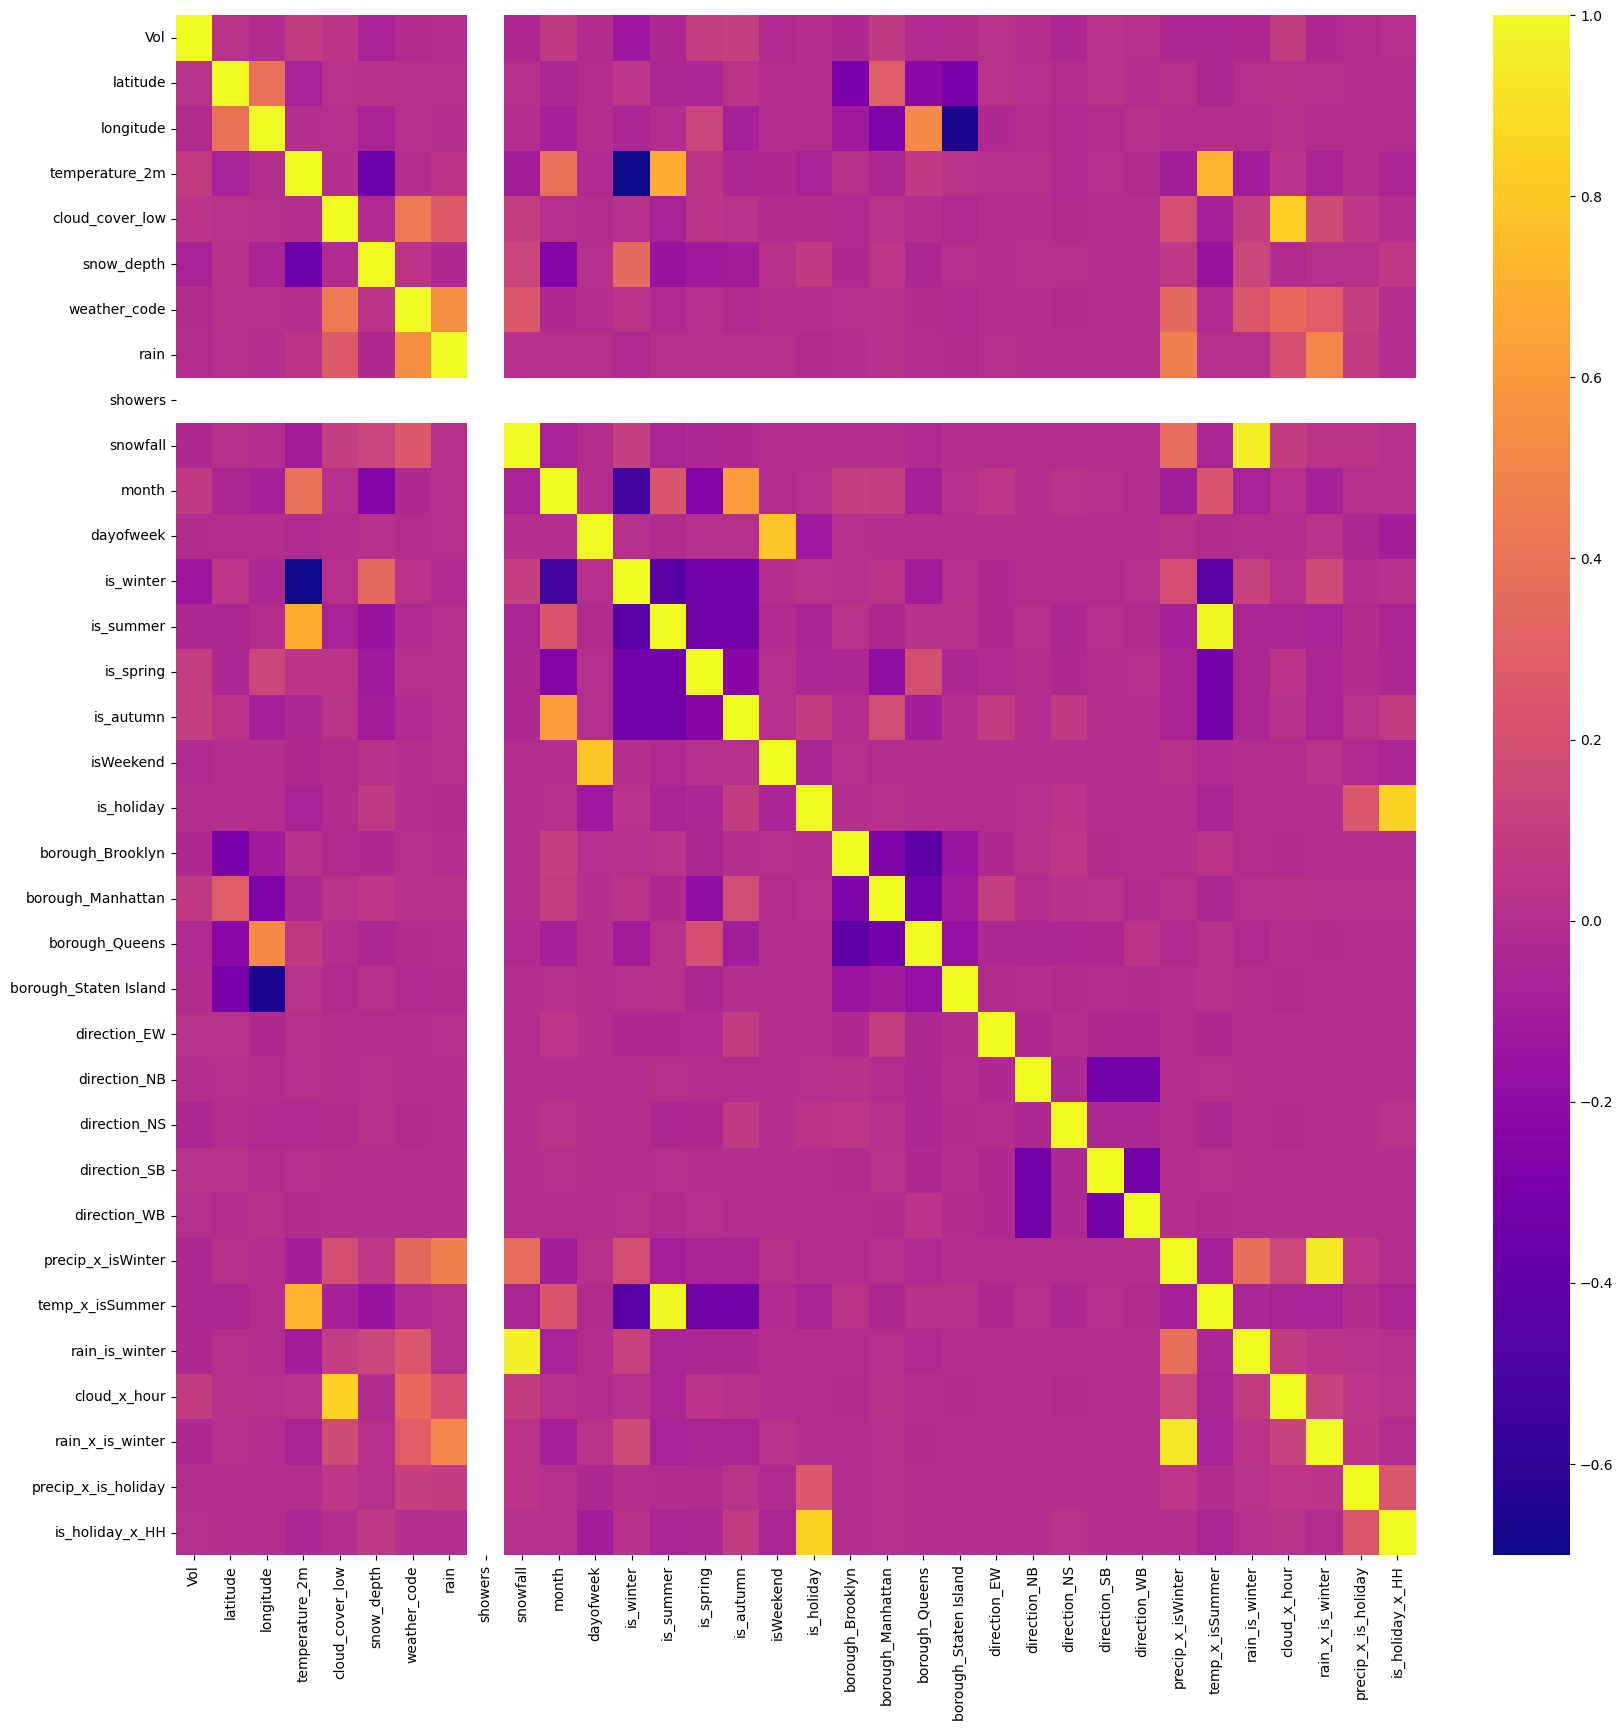

In [63]:
plt.figure(figsize=(20,20))
cor = cleared.corr()
sns.heatmap(cor, annot=False, cmap="plasma")
plt.show()

#Running the Linear Regression

In [64]:
X=cleared.drop(['Vol'], axis=1) #axis=1 means along the column, axis=0 means along the row
y=cleared['Vol']

Don't know if we need this:

In [65]:
# X = imputer.fit_transform(X)
# # Standardize the features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

Running the linear regression

In [66]:
#fit into model
lr=LinearRegression()
lr.fit(X, y)

LinearRegression()

Check R^2 value

In [67]:
# Make predictions using the fitted model
y_pred = lr.predict(X)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)

# Print the R^2 score
print(f"The R^2 value of the linear regression model is: {r2}")

The R^2 value of the linear regression model is: 0.051889276008872054
